In [1]:
import numpy as np
import random as rnd
from math import pi
from math import cos
from math import sin
from math import sqrt
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
N = 3500        # Tamaño de poblacion
box = 3.5         # Tamapo de la region box x box
I0 = 10          # Infectados iniciales
tmax = 1000      # Tiempo limite
Su = np.zeros(0, dtype=int)  # Desarrollo de poblacion suceptible a lo largo del tiempo
In = np.zeros(0, dtype=int)  # Desarrollo de poblacion infectada a lo largo del tiempo
#Re = np.zeros(0, dtype=int)  # Desarrollo de poblacion removida a lo largo del tiempo
tmax_infec = 100      #Tiempo de duracion de la infeccion
tmax_market = 4       #Tiempo en el mercado(?)

In [17]:
class Indv:         # Definicion de un individuo
    est = 'S'       # Estado S-> suceptible, I-> infectado, R-> removido
    x, y = 0, 0     # Coordenadas iniciales
    xcp, ycp = 0, 0      # Coordenadas auxiliares 
    t = 0    
    v = 0
    stepsize = 0.05    #Tamaño del paso
    r_infec = 0.05     #Radio de infeccion
    p_infec = 0.1      #Probabilidad de infeccion
    p_market = 0.002   #Probabilidad de ir al mercado
    t_market = 0       #Tiempo en el mercado

    def rand_walk(self):       #Caminata aleatoria
        if self.est == 'I':    
            self.t += 1        #Contador de tiempo infectado
        if self.t == tmax_infec:
            self.est = 'R'     #El individuo se cura
        theta = 2 * pi * rnd.random()    #Caminata dentro de un radio stepsize
        self.x += self.stepsize * cos(theta)
        self.y += self.stepsize * sin(theta)
        if abs(self.x) >= box:
            self.x += -2 * self.stepsize * cos(theta)
        if abs(self.y) >= box:
            self.y += -2 * self.stepsize * sin(theta)

    def virus(self):       #Definicion del virus
        if self.est == 'S':
            for iv in range(N):
                if self.est != 'S':
                    break
                elif pop[iv].est == 'I' and rnd.random() <= self.p_infec and sqrt(
                        (self.x - pop[iv].x) ** 2 + (self.y - pop[iv].y) ** 2) <= self.r_infec:
                    self.est = 'I'

    def walk_market(self):        #Caminata aleatoria pero existe la probabilidad de que el individuo visite un "mercado", que es un foco de infeccion
        if rnd.random() <= self.p_market and self.t_market == 0:
            self.xcp, self.ycp = self.x, self.y
            self.x, self.y = 0, 0
            self.t_market += 1
        elif self.t_market < tmax_market and self.t_market != 0:
            self.t_market += 1
        elif self.t_market == tmax_market:
            self.x, self.y = self.xcp, self.ycp
            self.t_market = 0
        else:
            if self.est == 'I':
                self.t += 1
            if self.t == tmax_infec:
                self.est = 'R'
            theta = 2 * pi * rnd.random()
            self.x += self.stepsize * cos(theta)
            self.y += self.stepsize * sin(theta)
            if abs(self.x) >= box:
                self.x += -2 * self.stepsize * cos(theta)
            if abs(self.y) >= box:
                self.y += -2 * self.stepsize * sin(theta)

In [73]:
pop = [Indv() for i in range(N)]   #Creacion de la poblacion

In [74]:
for i in range(N):              #Asignacion de las coordenadas de cada individuo
    pop[i].x, pop[i].y = box * (2 * rnd.random() - 1), box * (2 * rnd.random() - 1)
    if i < I0:                  #Asignacion de estatus I a I_O personas
        #       pop[i].t = rnd.randint(0, tmax_infec)
        pop[i].est = 'I'

In [75]:
start = time.time() #contador de tiempo de ejecucion
for step in range(tmax):
    print(100 * step / tmax)
    Su = np.append(Su,0)
    In = np.append(In,0)
    for person in range(N):
        pop[person].virus()
        pop[person].rand_walk()
#        pop[person].walk_market()
        if pop[person].est == 'S':
            Su[step] += 1
        elif pop[person].est == 'I':
            In[step] += 1
    if In[step] == 0:
        break
Re = N - Su - In
end = time.time()  

0.0
0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9
1.0
1.1
1.2
1.3
1.4
1.5
1.6
1.7
1.8
1.9
2.0
2.1
2.2
2.3
2.4
2.5
2.6
2.7
2.8
2.9
3.0
3.1
3.2
3.3
3.4
3.5
3.6
3.7
3.8
3.9
4.0
4.1
4.2
4.3
4.4
4.5
4.6
4.7
4.8
4.9
5.0
5.1
5.2
5.3
5.4
5.5
5.6
5.7
5.8
5.9
6.0
6.1
6.2
6.3
6.4
6.5
6.6
6.7
6.8
6.9
7.0
7.1
7.2
7.3
7.4
7.5
7.6
7.7
7.8
7.9
8.0
8.1
8.2
8.3
8.4
8.5
8.6
8.7
8.8
8.9
9.0
9.1
9.2
9.3
9.4
9.5
9.6
9.7
9.8
9.9
10.0
10.1
10.2
10.3
10.4
10.5
10.6
10.7
10.8
10.9
11.0
11.1
11.2
11.3
11.4
11.5
11.6
11.7
11.8
11.9
12.0
12.1
12.2
12.3
12.4
12.5
12.6
12.7
12.8
12.9
13.0
13.1
13.2
13.3
13.4
13.5
13.6
13.7
13.8
13.9
14.0
14.1
14.2
14.3
14.4
14.5
14.6
14.7
14.8
14.9
15.0
15.1
15.2
15.3
15.4
15.5
15.6
15.7
15.8
15.9
16.0
16.1
16.2
16.3
16.4
16.5
16.6
16.7
16.8
16.9
17.0
17.1
17.2
17.3
17.4
17.5
17.6
17.7
17.8
17.9
18.0
18.1
18.2
18.3
18.4
18.5
18.6
18.7
18.8
18.9
19.0
19.1
19.2
19.3
19.4
19.5
19.6
19.7
19.8
19.9
20.0
20.1
20.2
20.3
20.4
20.5
20.6
20.7
20.8
20.9
21.0
21.1
21.2
21.3
21.4
21.5
21.6
21.7
21.8
21.9


In [76]:
#fin de tiempo de ejecucion
print(end - start)

941.0141801834106


In [63]:
sns.set_theme()

In [77]:
X = [pop[i].x for i in range(N)]
Y = [pop[i].y for i in range(N)]
State = [pop[i].est for i in range(N)]

In [78]:
P = pd.DataFrame()
P['X'] = X
P['Y'] = Y
P['State'] = State

(-3.5, 3.5)

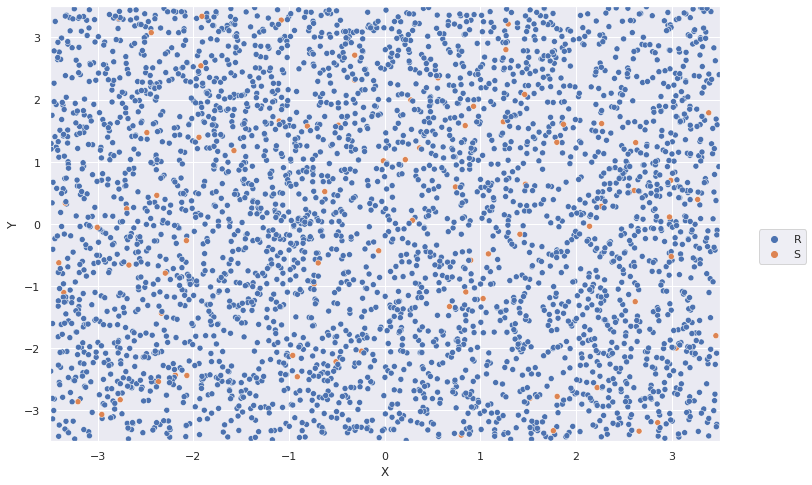

In [79]:
plt.figure(figsize=(12,8))
sns.scatterplot (data=P, x='X', y='Y', hue='State')
plt.legend(bbox_to_anchor=(1.05, 0.5))
plt.xlim([-box, box])
plt.ylim([-box, box])

In [12]:
from plotly import __version__
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

cf.go_offline()

In [80]:
lines = pd.DataFrame()
lines['Su'] = Su
lines['In'] = In
lines['Re'] = Re

In [81]:
lines.iplot()

In [87]:
print('Porcentaje de infeccion: ' + str((P.groupby('State').count()['X']['R']/3500)*100))

Porcentaje de infeccion: 97.71428571428571
